# Importing Dependencies


In [44]:
import tensorflow as tf
import numpy as np
import pandas as pd

## Loading Pretrained Model

In [63]:
model = tf.keras.models.load_model("/Users/imac/Desktop/Alexnet-Lenet-Image Classification/ultimate_LeNet_model")

### Unomment following to predict label of image directly with URL

In [ ]:
# """import matplotlib.pyplot as plt
# import numpy as np
# from keras.preprocessing import image
# from PIL import Image
# ########
# import requests
# from io import BytesIO
# response = requests.get('https://www.dnanews.com.pk/wp-content/uploads/2018/12/xToyota-xli-1024-e1544701002810.jpg.pagespeed.ic_.pEbaoO_yBW.jpg')
# test_image = Image.open(BytesIO(response.content))
# ########
# #test_image = image.load_img('/Users/imac/Desktop/')
# plt.imshow(test_image)
# plt.title('This is my Image for Testing')
# test_image = test_image.resize((32, 32), Image.ANTIALIAS)
# test_image = image.img_to_array(test_image)
# test_image = np.expand_dims(test_image,axis=0)
# print("Predicted Class is")
# print(model.predict_classes(test_image)[0])"""

####  Data (Image) Augmentation

In [ ]:
# pip install augmentor

In [ ]:
# import Augmentor
# p = Augmentor.Pipeline("/Users/imac/Desktop/image-dataset/_train/cat")

In [ ]:
# p.rotate(probability=0.5, max_left_rotation=10, max_right_rotation=10)
# p.zoom(probability=0.5, min_factor=1.1, max_factor=1.5)
# p.flip_random(probability=0.5)

In [ ]:
# p.sample(1500)

### Setting Paths of Images and Respective Labels in Dataframes

In [30]:
path=[]
label=[]
import os
for dirname, _, filenames in os.walk('/Users/imac/Desktop/image-dataset/_train'):
    for filename in filenames:
        path.append(os.path.join(dirname, filename))    
        label.append(os.path.basename(dirname))

In [31]:
df_train = pd.DataFrame(list(zip(path, label)), 
               columns =['Path', 'Label'])

In [36]:
df_train=df_train[1:-1]
df_train['Label'].unique()

array(['cat', 'car', 'fruit', 'dog', 'person', 'flower', 'motorbike',
       'airplane'], dtype=object)

In [ ]:
# path=[]
# label=[]
# import os
# for dirname, _, filenames in os.walk('/Users/imac/Desktop/image-dataset/_train/cat/output'):
#     for filename in filenames:
#         if ((os.path.basename(dirname))=="output"):
#             path.append(os.path.join(dirname, filename))    
#             label.append('cat')

In [ ]:
# df_train_augmented = pd.DataFrame(list(zip(path, label)), 
#                columns =['Path', 'Label'])

In [ ]:
# df_train_augmented['Path']

In [ ]:
# df_train['Path'][0]

In [ ]:
# df_train=pd.concat([df_train, df_train_augmented])

In [ ]:
df_train

In [37]:
path=[]
label=[]
import os
for dirname, _, filenames in os.walk('/Users/imac/Desktop/image-dataset/_test'):
    for filename in filenames:
        path.append(os.path.join(dirname, filename))    
        label.append(os.path.basename(dirname))

In [38]:
df_test = pd.DataFrame(list(zip(path, label)), 
               columns =['Path', 'Label'])

In [43]:
df_test=df_test[1:-1]

In [ ]:
# path=[]
# label=[]
# import os
# for dirname, _, filenames in os.walk('/Users/imac/Desktop/image-dataset/_test/cat/output'):
#     for filename in filenames:
#         if ((os.path.basename(dirname))=="output"):
#             path.append(os.path.join(dirname, filename))    
#             label.append('cat')

In [ ]:
# df_test_augmented = pd.DataFrame(list(zip(path, label)), 
#                columns =['Path', 'Label'])

In [ ]:
# df_test=pd.concat([df_test, df_test_augmented])

In [ ]:
# import tensorflow as tf

##### Shuffle DataFrames

In [45]:
from sklearn.utils import shuffle
df_train = shuffle(df_train)
df_test = shuffle(df_test)

##### Get Data in Batches

In [46]:
from keras.preprocessing.image import ImageDataGenerator

In [47]:
datagen=ImageDataGenerator(rescale=1./255.)

In [48]:
train_generator=datagen.flow_from_dataframe(
dataframe=df_train,
directory=None,
x_col="Path",
y_col="Label",
subset="training",
batch_size=32,
seed=42,
shuffle=True,
class_mode="categorical",
target_size=(32,32))

test_datagen=ImageDataGenerator(rescale=1./255.)
test_generator=test_datagen.flow_from_dataframe(
dataframe=df_test,
directory=None,
x_col="Path",
y_col="Label",
batch_size=32,
seed=42,
shuffle=False,
class_mode="categorical",
target_size=(32,32))

Found 5952 validated image filenames belonging to 8 classes.
Found 933 validated image filenames belonging to 8 classes.


/usr/local/Cellar/jupyterlab/2.2.5/libexec/lib/python3.8/site-packages/keras_preprocessing/image/dataframe_iterator.py:279: UserWarning: Found 1 invalid image filename(s) in x_col="Path". These filename(s) will be ignored.
  warnings.warn(
/usr/local/Cellar/jupyterlab/2.2.5/libexec/lib/python3.8/site-packages/keras_preprocessing/image/dataframe_iterator.py:279: UserWarning: Found 1 invalid image filename(s) in x_col="Path". These filename(s) will be ignored.
  warnings.warn(


In [ ]:
# model = tf.keras.models.load_model("ultimate_LeNet_model")
# model.summary()

In [ ]:
# model.layers[0].trainable=True
# model.layers[1].trainable=True
# model.layers[2].trainable=True
# model.layers[3].trainable=True
# model.layers[4].trainable=True
# model.layers[5].trainable=True
# model.layers[6].trainable=True
# model.layers[7].trainable=True

#### Removing Last(Classification) Layer and Adding New Classification Layer

In [51]:
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Dense,Flatten,Softmax

In [79]:
model.pop()
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 30, 30, 6)         168       
_________________________________________________________________
average_pooling2d_4 (Average (None, 15, 15, 6)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 13, 13, 16)        880       
_________________________________________________________________
average_pooling2d_5 (Average (None, 6, 6, 16)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 120)               69240     
_________________________________________________________________
dense_7 (Dense)              (None, 84)               

In [65]:
for layer in model.layers[:-1]: # go through until last layer
    pass
model.add(Dense(8, activation='softmax'))

In [70]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 30, 30, 6)         168       
_________________________________________________________________
average_pooling2d_4 (Average (None, 15, 15, 6)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 13, 13, 16)        880       
_________________________________________________________________
average_pooling2d_5 (Average (None, 6, 6, 16)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 120)               69240     
_________________________________________________________________
dense_7 (Dense)              (None, 84)               

In [71]:
label_map = (test_generator.class_indices)
print(label_map)

{'airplane': 0, 'car': 1, 'cat': 2, 'dog': 3, 'flower': 4, 'fruit': 5, 'motorbike': 6, 'person': 7}


In [72]:
model.compile(loss='categorical_crossentropy', optimizer=tf.optimizers.SGD(lr=0.001), metrics=['accuracy'])

In [ ]:
len(train_generator)

In [73]:
STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_TEST=test_generator.n//test_generator.batch_size
model.fit_generator(generator=train_generator,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    epochs=100
)

Epoch 1/100
186/186 [==============================] - 29s 155ms/step - loss: 1.2014 - accuracy: 0.5939
Epoch 2/100
186/186 [==============================] - 9s 50ms/step - loss: 0.9542 - accuracy: 0.6673
Epoch 3/100
186/186 [==============================] - 9s 50ms/step - loss: 0.8487 - accuracy: 0.6986
Epoch 4/100
186/186 [==============================] - 9s 50ms/step - loss: 0.7815 - accuracy: 0.7132
Epoch 5/100
186/186 [==============================] - 9s 50ms/step - loss: 0.7375 - accuracy: 0.7282
Epoch 6/100
186/186 [==============================] - 9s 50ms/step - loss: 0.6967 - accuracy: 0.7399
Epoch 7/100
186/186 [==============================] - 9s 51ms/step - loss: 0.6712 - accuracy: 0.7545
Epoch 8/100
186/186 [==============================] - 9s 51ms/step - loss: 0.6507 - accuracy: 0.7571
Epoch 9/100
186/186 [==============================] - 9s 51ms/step - loss: 0.6277 - accuracy: 0.7693
Epoch 10/100
186/186 [==============================] - 9s 50ms/step - loss: 0.6

##### Test set ACCURACY

In [74]:
model.evaluate_generator(generator=test_generator,
steps=STEP_SIZE_TEST)

Instructions for updating:
Please use Model.evaluate, which supports generators.


[0.5414458513259888, 0.8038793206214905]

##### Predictions

Predicted Class is
3


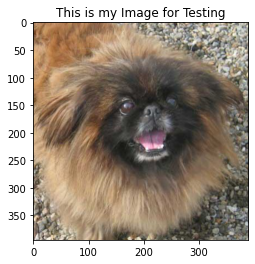

In [78]:
import matplotlib.pyplot as plt
from keras.preprocessing import image
from PIL import Image
test_image = image.load_img('/Users/imac/Desktop/image-dataset/_test/dog/dog_0077.jpg')
plt.imshow(test_image)
plt.title('This is my Image for Testing')
test_image = test_image.resize((32, 32), Image.ANTIALIAS)
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image,axis=0)
print("Predicted Class is")
print(model.predict_classes(test_image)[0])

In [76]:
'airplane': 0, 'car': 1, 'cat': 2, 'dog': 3, 'flower': 4, 'fruit': 5, 'motorbike': 6, 'person': 7

SyntaxError: invalid syntax (<ipython-input-76-7e0ca4e0949f>, line 1)

#### Run Following to Check Original Class Label Indices

In [ ]:
test_generator.class_indices